# Section1：入力層〜中間層
### 要点まとめ
- 入力：入力データ
- ノード：データを受け取る場所（入力データ数＝ノード数）
- 重み：各データの重要度合を表す(傾き)
- バイアス：値を偏らせるために広く同じ値を設定する際に使用する（切片）
- 総入力：各入力データに対して重みを掛け、全てを合計したものにバイアスをプラスしたもの

### 確認テスト
「この図式に動物分類の実例を入れてみよう。」
### 考察
入力にはデータの特徴量が入力される。<br>
アヤメの分類でいうところの、がく片の長さやがく片の幅。



### 確認テスト
「この数式をPythonで書け。」
### 考察
入力データと重みの内積をnumpyのdotメソッドを使用して計算している。

### 確認テスト
「1-1のファイルから、中間層の出力を定義しているソースを抜き出せ。」
### 考察
dotメソッドにて計算した総入力にReLU関数（functions.relu）を通して出力している。

### 実装演習

In [2]:
cd /content/drive/MyDrive/study_ai/DNN_code_colab_ver200425

/content/drive/MyDrive/study_ai/DNN_code_colab_ver200425


In [5]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

### 順伝播（3層・複数ユニット）

In [7]:
# 順伝播（3層・複数ユニット）

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['W3'] = np.array([
        [0.1, 0.3],
        [0.2, 0.4]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([1, 2])

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("重み3", network['W3'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )
    print_vec("バイアス3", network['b3'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = functions.relu(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = functions.relu(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力
    y = u3
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", z1)
    print("出力合計: " + str(np.sum(z1)))

    return y, z1, z2

# 入力値
x = np.array([1., 2.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network()

y, z1, z2 = forward(network, x)

*** 入力 ***
[1. 2.]

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** 重み3 ***
[[0.1 0.3]
 [0.2 0.4]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

*** バイアス3 ***
[1 2]

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.02 2.29]

*** 出力1 ***
[0.6 1.3 2. ]

出力合計: 3.9


# Section2：活性化関数
### 要点まとめ
- ニューラルネットワークにおいて、次の層への出力の大きさを決める非線形の関数。入力値の値によって、次の層への信号のON/OFFや強弱を定める働きをもつ。
- 中間層用：sigmoid関数、tanh関数、ReLU関数、ステップ関数
- 出力層用：sigmoid関数、softmax関数、恒等写像

### 確認テスト
「線形と非線形の違いを図に書いて簡易に説明せよ。」
### 考察
線形な関数は加法性と斉次性を満たすが、非線形な関数は両方とも満たさない。



### 確認テスト
「配布されたソースコードより、該当する箇所を抜き出せ。」
### 考察
commonフォルダからfunctionファイルを読み込んで使用している。functionファイル内に様々な活性化関数が記述されている。

### functionファイル内に記述されている活性化関数のコード

In [8]:
# 中間層の活性化関数
# シグモイド関数（ロジスティック関数）
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# ReLU関数
def relu(x):
    return np.maximum(0, x)

# Section3：出力層
### 要点まとめ
中間層からの出力を入力として受け取り、分類問題における各クラスの確率や回帰問題における予測値を出力する。誤差関数を用い、正解データとの誤差も算出する。誤差関数は、回帰問題は恒等写像を、分類問題は交差エントロピーを用いる。

### 確認テスト
- なぜ、引き算でなく二乗するか述べよ
- 1/2はどういう意味を持つか述べよ
### 考察
誤差を相殺する工夫や微分の計算をやりやすくする工夫等が行われている。複雑なモノをシンプルに考えれるようにすることが重要。

### 確認テスト
ソフトマックス関数<br>
「①〜③の数式に該当するソースコードを示し、一行ずつ処理の
説明をせよ。」
### 考察
numpy sum関数とexp関数を使用している。求めたいクラスを全体で割って確率を計算している。

### 確認テスト
交差エントロピー関数<br>
「①〜②の数式に該当するソースコードを示し、一行ずつ処理の
説明をせよ。」
### 考察
交差エントロピー誤差は分類問題でよく使用する。対数関数はｘが０に近づくとyが-∞に近づく為、ごくわずかな値（1e-7）をプラスすることでｘが０にならないようにし、計算がスムーズに動くようにしている。

### functionファイル内に記述されているソフトマックス関数と交差エントロピー関数のコード

In [9]:
# 出力層の活性化関数
# ソフトマックス関数
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

# ソフトマックスとクロスエントロピーの複合関数
def softmax_with_loss(d, x):
    y = softmax(x)
    return cross_entropy_error(d, y)

# 誤差関数
# 平均二乗誤差
def mean_squared_error(d, y):
    return np.mean(np.square(d - y)) / 2

# クロスエントロピー
def cross_entropy_error(d, y):
    if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size:
        d = d.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size


# Section4：勾配降下法
### 要点まとめ
ニューラルネットワークのパラメータを最適化する為に使用する。最適化とは、誤差を最小化するパラメータを見つけることである。また、学習率を適切に設定することで、局所最適解ではなく、大域的最適解に辿り着ける。学習率を最適化する為にいくつかの学習率最適化手法がある。（Momentum、AdaGrad、Adadelta、Adam）最近ではAdamがよく使われる。<br>

- 勾配降下法
 - 全データの平均誤差を最小化
- 確率的勾配降下法（SGD）
 - ランダムに抽出したサンプルの誤差を最小化
 - 計算コストを軽減
 - 局所最適解に収束するリスクを軽減
 - オンライン学習が可能
- ミニバッチ勾配降下法
 - ランダムに分割したデータの集合（ミニバッチ）に属するサンプルの平均誤差を最小化
 - オンライン学習にて計算コストを軽減
 - CPUを使用したスレッド並列化やGPUを利用したSingle Instruction Multi Data（SIMD）並列化が可能

### 確認テスト
「オンライン学習とは何か」
### 考察
メモリ容量により学習できるデータ量が制限され、一度に全データを学習することが難しい為、オンライン学習のようなデータを小分けにして学習する手法が必要となる。

# Section5：誤差逆伝播法
### 要点まとめ
数値微分では各パラメータそれぞれについて計算する
為、順伝搬の計算を繰り返し行う必要があり負荷が高くなる。誤差逆伝播法では算出された誤差を出力層側から順に微分し、前の層へ伝播することで最小の計算で各パラメータでの微分値を解析的に計算する。

### 確認テスト
「誤差逆伝播法では不要な再帰的処理を避ける事が出来る。既に行った計算結果を保持しているソースコードを抽出せよ。」
### 考察
誤差関数の結果Eを予測結果yで微分した結果であるdelta2を、重みW2の転置とドット積で掛けたものに、活性化関数の微分を掛けている。同じように後ろから前へ微分の結果を伝播させる事で、計算コストを削減している。

# 確率勾配降下法

##### 結果表示 #####


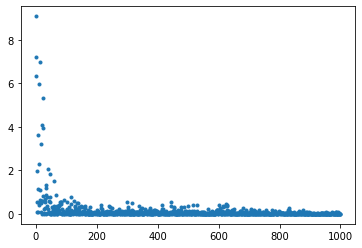

In [9]:
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    # print_vec("偏微分_重み1", grad["W1"])
    # print_vec("偏微分_重み2", grad["W2"])
    # print_vec("偏微分_バイアス1", grad["b1"])
    # print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()